Perform Facial Recognition with Deep Learning in Keras Using CNN
Project 2 

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

# Load the datset

In [26]:
import numpy as np
import tensorflow as tf

In [27]:
trainX = np.load('trainX.npy', allow_pickle='TRUE')
trainY = np.load('trainY.npy', allow_pickle='TRUE')
testX = np.load('testX.npy', allow_pickle='TRUE')
testY = np.load('testY.npy', allow_pickle='TRUE')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


(240, 10304)
(240,)
(160, 10304)
(160,)


In [28]:
trainY[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3], dtype=uint8)

In [29]:
trainY.min(), trainY.max()

(0, 19)

In [30]:
#we have 20 people data

In [31]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes= 20)


In [32]:
trainY.shape


(240, 20)

#Number of channels =1, h, w reshape for the same

In [33]:
trainX =trainX.reshape(240, 112, 92, 1)

In [34]:
testX = testX.reshape(160, 112, 92, 1)



#view the images

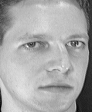

In [35]:
tf.keras.preprocessing.image.array_to_img(trainX[1])


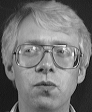

In [36]:
tf.keras.preprocessing.image.array_to_img(trainX[20])


#build the model

In [37]:
tf.keras.backend.clear_session()
ownmodel = tf.keras.models.Sequential()
ownmodel.add(tf.keras.layers.Reshape((112, 92, 1), input_shape=(112,92,1)))
#normalize the input
ownmodel.add(tf.keras.layers.BatchNormalization())
ownmodel.add(tf.keras.layers.Conv2D(32, #no of filters 
                                 kernel_size=(3, 3), activation='relu'))          
ownmodel.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 
ownmodel.add(tf.keras.layers.Dropout(0.3))
ownmodel.add(tf.keras.layers.Conv2D(64, #no of filters 
                                 kernel_size=(3, 3), activation='relu'))          
ownmodel.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 
ownmodel.add(tf.keras.layers.Dropout(0.3))
ownmodel.add(tf.keras.layers.Conv2D(128, #no of filters 
                                 kernel_size=(3, 3), activation='relu'))          
ownmodel.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 
ownmodel.add(tf.keras.layers.Dropout(0.3))

ownmodel.add(tf.keras.layers.Conv2D(256, #no of filters 
                                 kernel_size=(3, 3), activation='relu'))          
ownmodel.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 
ownmodel.add(tf.keras.layers.Dropout(0.3))


#flatten the extracted features in a single dim

In [38]:
ownmodel.add(tf.keras.layers.Flatten())
ownmodel.add(tf.keras.layers.Dense(20, activation='softmax'))


#Set optimizer and loss

In [39]:
ownmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 112, 92, 1)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 92, 1)        4         
_________________________________________________________________
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0

In [40]:
ownmodel.compile(optimizer='adam', loss ='categorical_crossentropy',
             metrics=['accuracy'])

In [41]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.0001)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)

#Train the model

In [43]:
ownmodel.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=16,callbacks=[learning_rate_reduction])


Train on 240 samples, validate on 160 samples
Epoch 1/30
240/240 [==============================] - 3s 14ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.2723 - val_acc: 0.9250
Epoch 2/30
240/240 [==============================] - 3s 14ms/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 0.2608 - val_acc: 0.9250
Epoch 3/30
240/240 [==============================] - 3s 14ms/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2699 - val_acc: 0.9250
Epoch 4/30
224/240 [===========================>..] - ETA: 0s - loss: 0.0167 - acc: 0.9955
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00032768002711236477.
240/240 [==============================] - 3s 14ms/sample - loss: 0.0156 - acc: 0.9958 - val_loss: 0.4164 - val_acc: 0.9062
Epoch 5/30
240/240 [==============================] - 3s 14ms/sample - loss: 0.0576 - acc: 0.9750 - val_loss: 0.3407 - val_acc: 0.9000
Epoch 6/30
240/240 [==============================] - 3s 14ms/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 0.3458 -

In [101]:
final_loss, final_acc = ownmodel.evaluate(testX, testY, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.207454, final accuracy: 0.968750


Using Resnet Transfer learning
-prepare data to have 3 channels

In [45]:
trainX = np.load('trainX.npy', allow_pickle='TRUE')
trainY = np.load('trainY.npy', allow_pickle='TRUE')
testX = np.load('testX.npy', allow_pickle='TRUE')
testY = np.load('testY.npy', allow_pickle='TRUE')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [46]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes= 20)


In [47]:
trainX = trainX.reshape(240, 112, 92)
testX = testX. reshape(160, 112, 92)

In [48]:
trainX = np.repeat(trainX[..., np.newaxis], 3,-1)
testX = np.repeat(testX[..., np.newaxis], 3, -1)


In [49]:
trainX.shape

(240, 112, 92, 3)

In [50]:
testX.shape

(160, 112, 92, 3)

#Create resnet model and download pretrained weights

In [51]:
model50 = tf.keras.applications.resnet50.ResNet50(include_top=False # we will make our own FC layer
                                               ,input_shape=(112, 92, 3),
                                               weights= 'imagenet', classes=20,input_tensor=None )

In [52]:
#set the base layers to not trainable and we will add  our own layers
for layer in model50.layers:
    layer.trainable = False

In [53]:
model50.output

<tf.Tensor 'conv5_block3_out/Relu:0' shape=(?, 4, 3, 2048) dtype=float32>

#Add FC layers for our classes

In [54]:
#lets get the output tensor
x = model50.output

#Flatten the output in single dim
x = tf.keras.layers.Flatten()(x)

#Add one intermediate dense layer
x = tf.keras.layers.Dense(2000, activation='relu')(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dense(500, activation='relu')(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)


#lets then add the final classification layer(20 modes)
prediction50 = tf.keras.layers.Dense(20, activation = 'softmax')(x)


#Build the final model

In [55]:
final_model50 = tf.keras.models.Model(inputs=model50.input, #Pre-trained model input as input layer
                                   outputs=prediction50)   #Output layer added

In [56]:
final_model50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
final_model50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 92, 3)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 98, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 46, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 46, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

#Run the training

In [59]:
#from keras.callbacks import ReduceLROnPlateau #keras.io/api/callbacks


learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.0001)


In [33]:
#final_model50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
#trainX =trainX.reshape(240, 112, 92, 3)
#testX = testX.reshape(160, 112, 92, 3)

In [60]:

final_model50.fit(trainX, trainY, validation_data=(testX, testY),
                epochs=30, batch_size =16, callbacks=[learning_rate_reduction])

Train on 240 samples, validate on 160 samples
Epoch 1/30
240/240 [==============================] - 20s 82ms/sample - loss: 6.3496 - acc: 0.2000 - val_loss: 5.6908 - val_acc: 0.1187
Epoch 2/30
240/240 [==============================] - 14s 60ms/sample - loss: 1.0441 - acc: 0.7125 - val_loss: 7.1575 - val_acc: 0.0812
Epoch 3/30
240/240 [==============================] - 14s 60ms/sample - loss: 0.2104 - acc: 0.9417 - val_loss: 5.3204 - val_acc: 0.2438
Epoch 4/30
240/240 [==============================] - 14s 60ms/sample - loss: 0.0145 - acc: 0.9958 - val_loss: 11.2149 - val_acc: 0.1000
Epoch 5/30
240/240 [==============================] - 14s 60ms/sample - loss: 0.0056 - acc: 1.0000 - val_loss: 5.5076 - val_acc: 0.2625
Epoch 6/30
240/240 [==============================] - 14s 60ms/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 5.4669 - val_acc: 0.1875
Epoch 7/30
240/240 [==============================] - 14s 60ms/sample - loss: 4.9022e-04 - acc: 1.0000 - val_loss: 5.2563 - val_acc: 0.18

#another model

In [61]:
model101= tf.keras.applications.resnet.ResNet101(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(112, 92, 3), classes=20 )

In [62]:
#set the base layers to not trainable and we will add  our own layers
for layer in model101.layers:
    layer.trainable = False

In [63]:
model101.output

<tf.Tensor 'conv5_block3_out_1/Relu:0' shape=(?, 4, 3, 2048) dtype=float32>

#Add FC layers

In [66]:
#lets get the output tensor
x = model101.output

#Flatten the output in single dim
x = tf.keras.layers.Flatten()(x)

#Add one intermediate dense layer
#x = tf.keras.layers.Dense(2000, activation='relu')(x)
#x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dense(500, activation='relu')(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)


#lets then add the final classification layer(20 modes)
prediction101 = tf.keras.layers.Dense(20, activation = 'softmax')(x)


In [67]:
final_model101 = tf.keras.models.Model(inputs=model101.input,
                                   outputs=prediction101)

In [68]:
final_model101.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 112, 92, 3)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 98, 3)   0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 46, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 46, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
#Run the training

In [69]:
final_model101.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)


In [71]:
final_model101.fit(trainX, trainY, validation_data=(testX, testY),
                epochs=25, batch_size =16,callbacks=[learning_rate_reduction] )

Train on 240 samples, validate on 160 samples
Epoch 1/25
240/240 [==============================] - 30s 126ms/sample - loss: 1.7625 - acc: 0.5833 - val_loss: 6.9282 - val_acc: 0.1312
Epoch 2/25
240/240 [==============================] - 20s 84ms/sample - loss: 0.1517 - acc: 0.9708 - val_loss: 11.1720 - val_acc: 0.1312
Epoch 3/25
240/240 [==============================] - 20s 85ms/sample - loss: 0.0870 - acc: 0.9708 - val_loss: 17.8078 - val_acc: 0.1000
Epoch 4/25
224/240 [===========================>..] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
240/240 [==============================] - 21s 88ms/sample - loss: 0.0046 - acc: 1.0000 - val_loss: 16.7724 - val_acc: 0.0875
Epoch 5/25
240/240 [==============================] - 20s 85ms/sample - loss: 0.0131 - acc: 0.9917 - val_loss: 15.6284 - val_acc: 0.1187
Epoch 6/25
240/240 [==============================] - 20s 85ms/sample - loss: 2.9509e-04 - acc: 1.0000 - val_

#we use the best model

In [76]:
testX = np.load('testX.npy', allow_pickle='TRUE')

In [78]:
testX = testX. reshape(160, 112, 92, 1)

In [102]:
final_prediction = ownmodel.predict(testX)
final_prediction.shape

(160, 20)

In [103]:
print('Number of Misclassifications', ((final_prediction.argmax(axis=1))!=(testY.argmax(axis=1))).sum())

Number of Misclassifications 5


In [104]:
final_prediction.argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  7,  9,  9,  9,  7, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 19, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 15, 18, 18, 18, 15, 18, 19,
       19, 19, 19, 19, 19, 19, 19])

In [105]:
testY.argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19])

In [106]:
trainX = np.load('trainX.npy', allow_pickle='TRUE')
#trainY = np.load('trainY.npy', allow_pickle='TRUE')
#testX = np.load('testX.npy', allow_pickle='TRUE')
#testY = np.load('testY.npy', allow_pickle='TRUE')
#print(trainX.shape)
trainX = trainX. reshape(240, 112, 92, 1)

In [97]:
s=ownmodel.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=16,
                   callbacks=[learning_rate_reduction])

Train on 240 samples, validate on 160 samples
Epoch 1/30
240/240 [==============================] - 3s 14ms/sample - loss: 2.5932e-04 - acc: 1.0000 - val_loss: 0.2278 - val_acc: 0.9563
Epoch 2/30
240/240 [==============================] - 3s 14ms/sample - loss: 2.8268e-04 - acc: 1.0000 - val_loss: 0.2296 - val_acc: 0.9563
Epoch 3/30
240/240 [==============================] - 3s 14ms/sample - loss: 1.4593e-04 - acc: 1.0000 - val_loss: 0.2298 - val_acc: 0.9563
Epoch 4/30
240/240 [==============================] - 3s 14ms/sample - loss: 3.7119e-04 - acc: 1.0000 - val_loss: 0.2275 - val_acc: 0.9563
Epoch 5/30
240/240 [==============================] - 3s 14ms/sample - loss: 9.4190e-05 - acc: 1.0000 - val_loss: 0.2258 - val_acc: 0.9625
Epoch 6/30
240/240 [==============================] - 3s 14ms/sample - loss: 4.8168e-04 - acc: 1.0000 - val_loss: 0.2248 - val_acc: 0.9625
Epoch 7/30
240/240 [==============================] - 3s 14ms/sample - loss: 1.5761e-04 - acc: 1.0000 - val_loss: 0.2242

In [111]:
pip install matplotlib

     |████████████████████████████████| 11.5 MB 25.1 MB/s eta 0:00:01     |█████████████████████████████   | 10.5 MB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 82.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


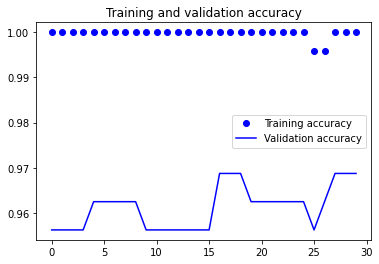

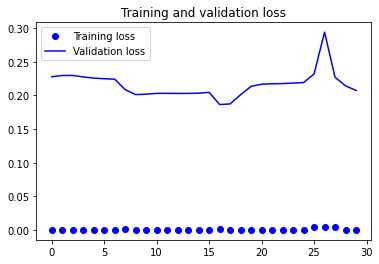

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt


print(s.history.keys())
accuracy = s.history['acc']
val_accuracy = s.history['val_acc']
loss = s.history['loss']
val_loss = s.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()